##  Salary Prediction

Importing all   necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
from sklearn.preprocessing import binarize

In [2]:
columns=['age','workclass','fnlwgt','education','education-num','marital_status','occupation','relationship','race','sex','capital_gain'
        ,'capital-loss','hours-per-week','native-country','income']

In [3]:
data=pd.read_csv('data.csv',names=columns)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.describe()

,age,fnlwgt,education-num,capital_gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


cheking for any null value

In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Distributing 'age' into different categories

In [8]:
age_categ=[]
for age in data.age:
    if age<13:
        age_categ.append('kid')
    else:
        if age<19:
            age_categ.append('teen')
        else:
            if age<35:
                age_categ.append('young')
            else:
                if age<50:
                    age_categ.append('adult')
                else:
                    age_categ.append('old')
data.insert(1,'age_categ',age_categ)

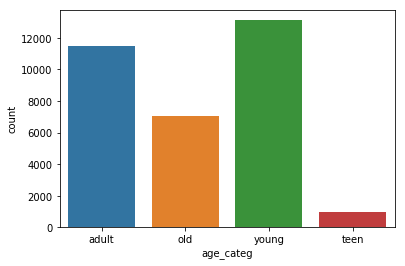

In [9]:
sns.countplot(data.age_categ)

Dropping 'age' column

In [10]:
data.drop(['age'],axis=1,inplace =True)

In [11]:
data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

'?' is not any workclass . It needs to be handled.

In [12]:
(data.workclass==' ?').sum()/len(data)*100
# 5 percent of workclass is filled with ?

5.638647461687294

Filling '?' in workclass with mode

In [13]:
data.workclass.replace(' ?',data.workclass.mode()[0],inplace=True)

Never-worked and Without-pay can be considered as same column

In [14]:
data.workclass.replace(' Never-worked',' Without-pay',inplace=True)

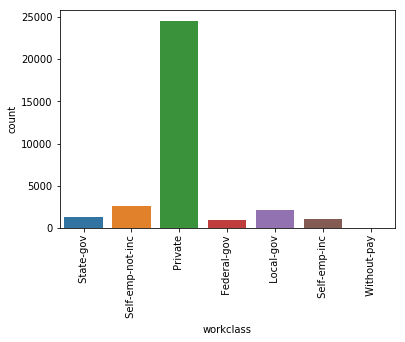

In [15]:
plt.xticks(rotation=90)
sns.countplot(data.workclass)

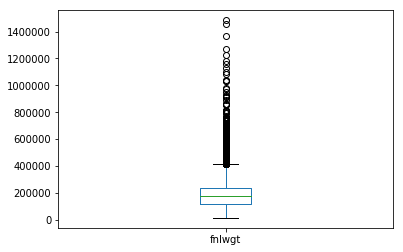

In [16]:
data.fnlwgt.plot(kind='box')

There are some outliers which needs to be handled.

In [17]:
data=data[data.fnlwgt<600000]

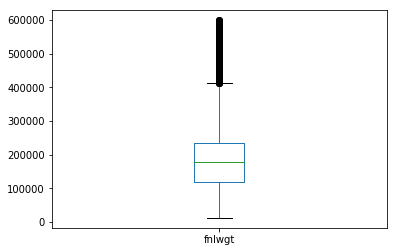

In [18]:
data.fnlwgt.plot(kind='box')

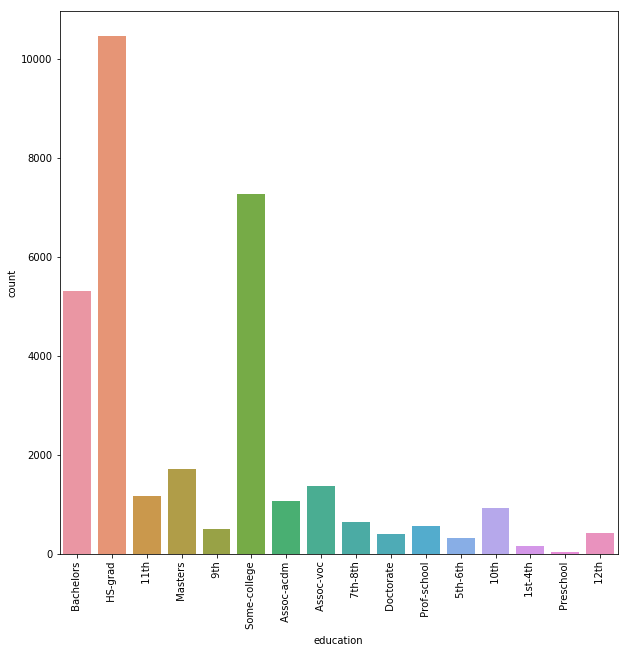

In [19]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(data.education)

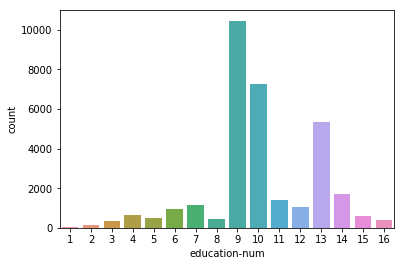

In [20]:
sns.countplot(data['education-num'])
#education number is alternative way of representating education column so we can drop one of them

In [21]:
data.drop(['education'],axis=1,inplace=True)

Different categories in 'marital_status'

In [22]:
data['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

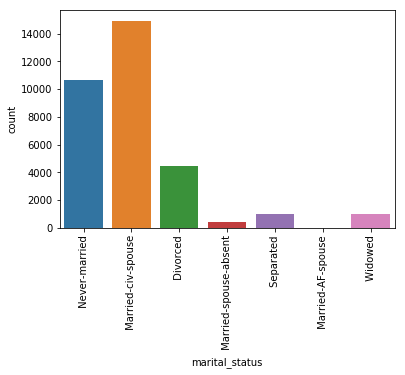

In [23]:
plt.xticks(rotation=90)
sns.countplot(data['marital_status'])

In [24]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Filling '?' in occupation with mode

In [25]:
data.occupation.replace(' ?',data.occupation.mode()[0],inplace=True)

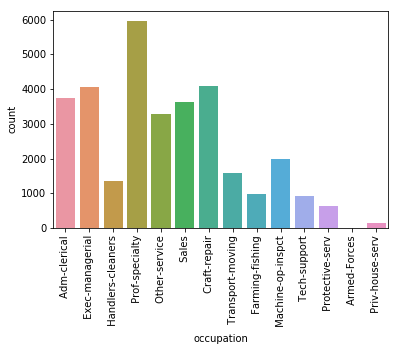

In [26]:
plt.xticks(rotation=90)
sns.countplot(data.occupation)

In [27]:
data.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

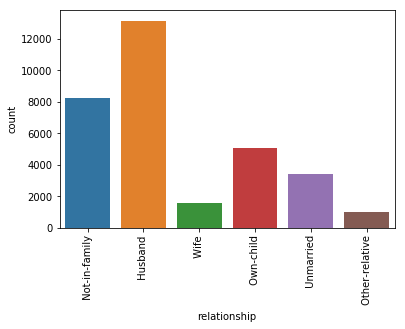

In [28]:
plt.xticks(rotation=90)
sns.countplot(data.relationship)

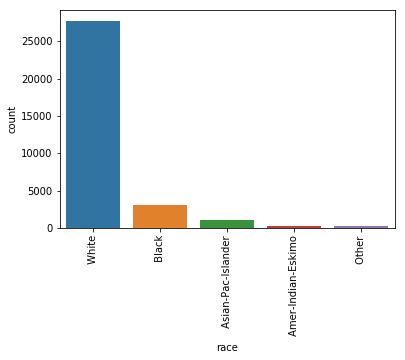

In [29]:
plt.xticks(rotation=90)
sns.countplot(data.race)

In [30]:
data.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

Asian-Pac-Islander,Amer-Indian-Eskim can be combined to other category because they have very low count

In [31]:
replace=data.race.unique()[2:]
for to_replace in replace:
    print(to_replace)
    data['race'].replace(to_replace,' Other',inplace=True)

 Asian-Pac-Islander
 Amer-Indian-Eskimo
 Other


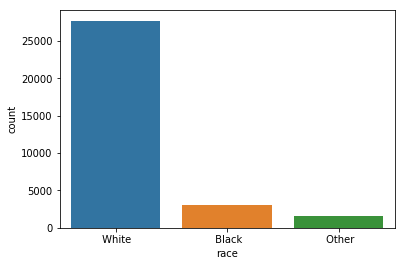

In [32]:
sns.countplot(data.race)

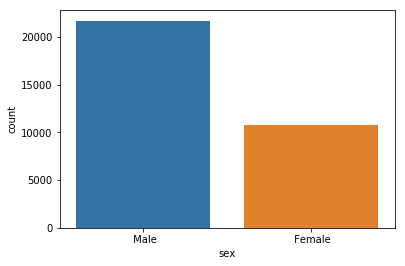

In [33]:
sns.countplot(data.sex)

we can make two categories in capital gain one with no capital and another with some capital

In [34]:
data['is_capital']=[0 if capital==0 else 1 for capital in data['capital_gain']]

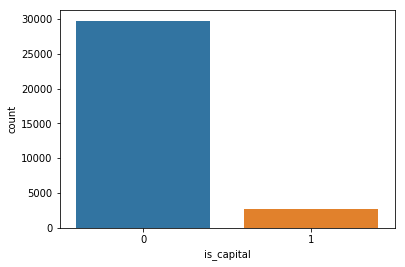

In [35]:
sns.countplot(data['is_capital'])

we can make two categories in capital loss one with no capital loss and another with some capital loss

In [36]:
data['is_loss']=[0 if capital==0 else 1 for capital in data['capital-loss']]

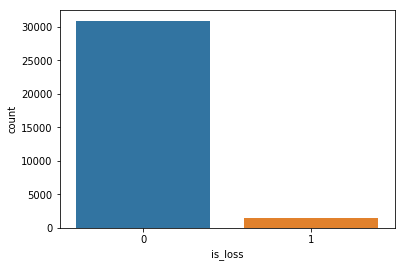

In [37]:
sns.countplot(data['is_loss'])

In [38]:
#dropping capital_gain and capital_loss
data.drop(['capital_gain','capital-loss'],axis=1,inplace=True)

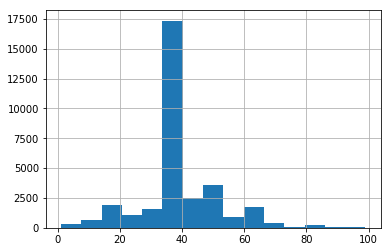

In [39]:
data['hours-per-week'].hist(bins=15)

Dividing 'hours-per-week' into categories

In [40]:
diff_hours_categ=['>=60','>40&<60','<=40&>30','<=30']
hours_categ=[]
for hours in data['hours-per-week']:
    if hours>=60:
        hours_categ.append(diff_hours_categ[0])
    else:
        if hours>40:
            hours_categ.append(diff_hours_categ[1])
        else:
            if hours>30:
                hours_categ.append(diff_hours_categ[2])
            else:
                hours_categ.append(diff_hours_categ[3])
data['hours_categ_week']=hours_categ

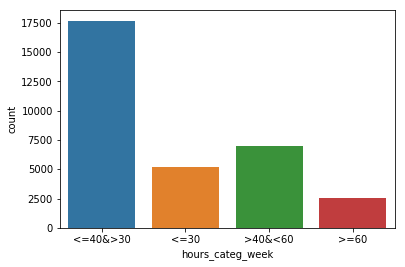

In [41]:
sns.countplot(data['hours_categ_week'])

In [42]:
#dropping hours per week
data.drop(['hours-per-week'],axis=1,inplace=True)

In [43]:
data['native-country'].value_counts()

 United-States                 29048
 Mexico                          636
 ?                               580
 Philippines                     198
 Germany                         136
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     101
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         58
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        32
 Peru                             31
 

Since,except United-States other countries have low count so they can belong to same category(other)

In [44]:
# we can make only two native country United-States and other
data['native-country']=[' United-States' if country==' United-States' else ' Other' for country in data['native-country']]

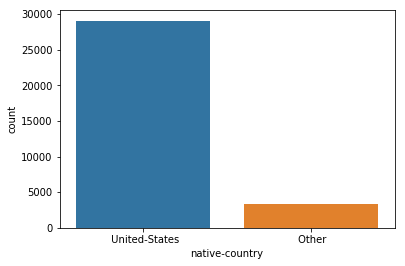

In [45]:
sns.countplot(data['native-country'])

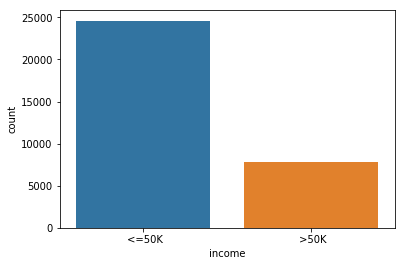

In [46]:
sns.countplot(data.income)

###### Finally,after performing data cleaning and feature engineering let's take a look at our dataset

In [47]:
data.head()

,age_categ,workclass,fnlwgt,education-num,marital_status,occupation,relationship,race,sex,native-country,income,is_capital,is_loss,hours_categ_week
0,adult,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,1,0,<=40&>30
1,old,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,0,0,<=30
2,adult,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,0,0,<=40&>30
3,old,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,0,0,<=40&>30
4,young,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Other,<=50K,0,0,<=40&>30


##### Now lets start bivariate analysis

Text(0, 0.5, 'percentage of income categ')

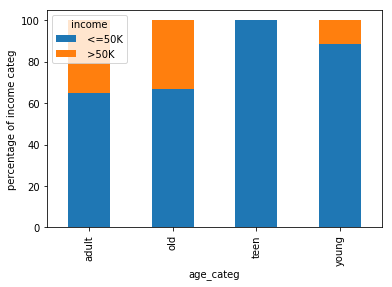

In [48]:
diff_categ_count=data['age_categ'].value_counts()
group_table=data.groupby(['age_categ','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

In [49]:
#since adult and old distrbution is similar in income so we can make them one 
data.age_categ.replace('old','adult',inplace=True)

Text(0, 0.5, 'percentage of income categ')

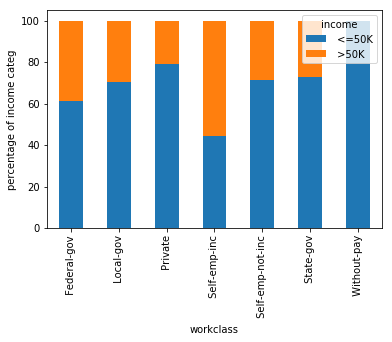

In [50]:
diff_categ_count=data['workclass'].value_counts()
group_table=data.groupby(['workclass','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

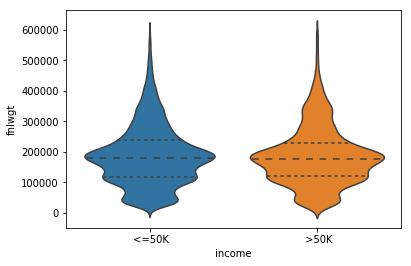

In [51]:
sns.violinplot(data['income'],data['fnlwgt'],inner='quart')

As we can see that fnlwgt distribution is same for both income types so we can drop it

In [52]:
data.drop(['fnlwgt'],axis=1,inplace=True)

Text(0, 0.5, 'percentage of income categ')

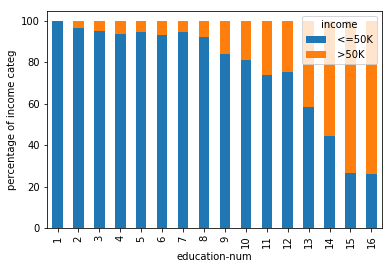

In [53]:
diff_categ_count=data['education-num'].value_counts()
group_table=data.groupby(['education-num','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

In [54]:
# 15 and 16  , 11 and 12 , 2 and 3 ,4 to 7 can be combined
replace_dict={
    15:16,11:12,3:2,5:4,6:4,7:4
}
for num in replace_dict:
    data.replace(num,replace_dict[num],inplace=True)

Text(0, 0.5, 'percentage of income categ')

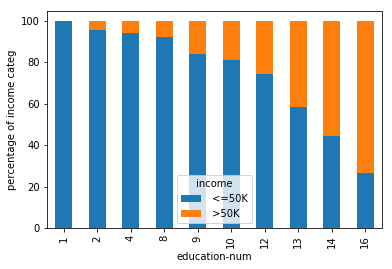

In [55]:
diff_categ_count=data['education-num'].value_counts()
group_table=data.groupby(['education-num','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0, 0.5, 'percentage of income categ')

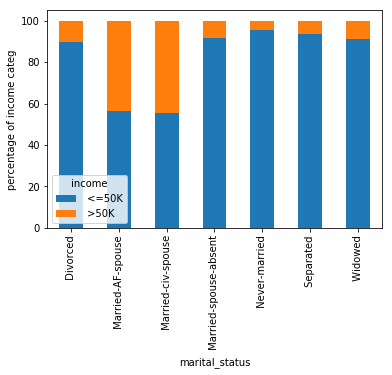

In [56]:
diff_categ_count=data['marital_status'].value_counts()
group_table=data.groupby(['marital_status','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

In [57]:
#reducing some categories
data.replace(' Married-civ-spouse',' Married-AF-spouse',inplace=True)
data.replace(' Married-spouse-absent',' Widowed',inplace=True)

Text(0, 0.5, 'percentage of income categ')

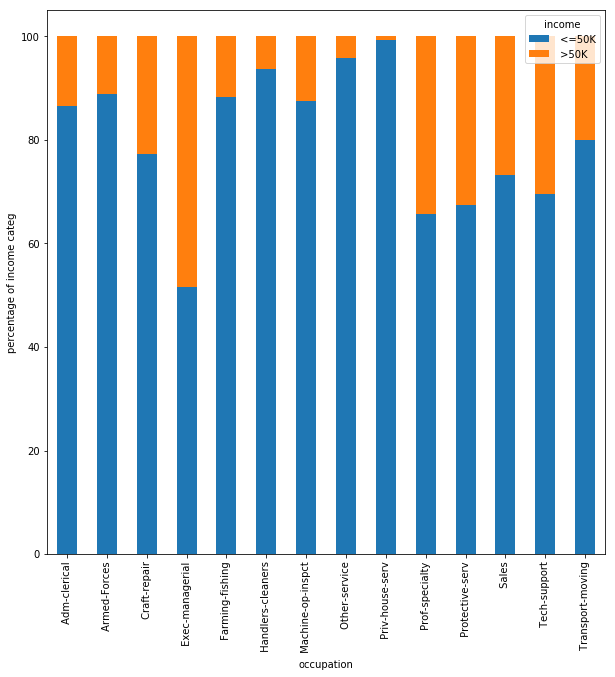

In [58]:
diff_categ_count=data['occupation'].value_counts()
group_table=data.groupby(['occupation','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True,figsize=(10,10))
plt.ylabel('percentage of income categ')

Text(0, 0.5, 'percentage of income categ')

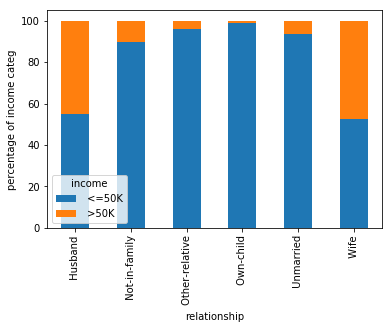

In [59]:
diff_categ_count=data['relationship'].value_counts()
group_table=data.groupby(['relationship','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0, 0.5, 'percentage of income categ')

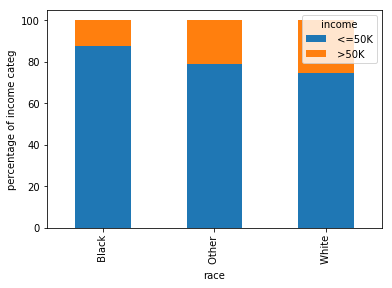

In [60]:
diff_categ_count=data['race'].value_counts()
group_table=data.groupby(['race','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0, 0.5, 'percentage of income categ')

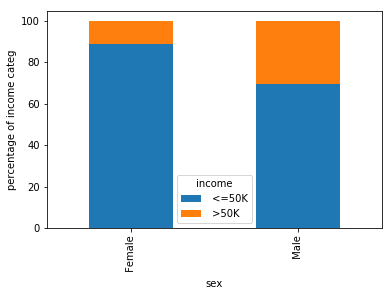

In [61]:
diff_categ_count=data['sex'].value_counts()
group_table=data.groupby(['sex','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0, 0.5, 'percentage of income categ')

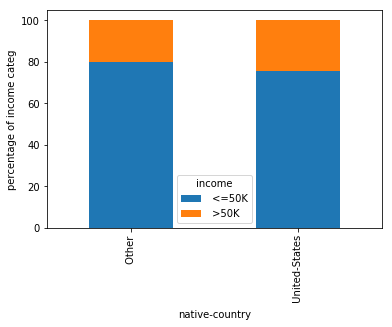

In [62]:
diff_categ_count=data['native-country'].value_counts()
group_table=data.groupby(['native-country','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0, 0.5, 'percentage of income categ')

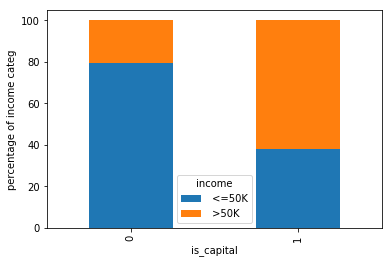

In [63]:
diff_categ_count=data['is_capital'].value_counts()
group_table=data.groupby(['is_capital','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0, 0.5, 'percentage of income categ')

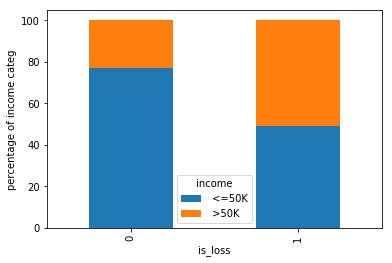

In [64]:
diff_categ_count=data['is_loss'].value_counts()
group_table=data.groupby(['is_loss','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0, 0.5, 'percentage of income categ')

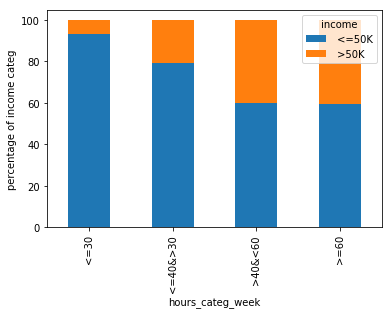

In [65]:
diff_categ_count=data['hours_categ_week'].value_counts()
group_table=data.groupby(['hours_categ_week','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

In [66]:
data.replace('>=60','>40',inplace=True)
data.replace('>40&<60','>40',inplace=True)

In [67]:
data.head()

,age_categ,workclass,education-num,marital_status,occupation,relationship,race,sex,native-country,income,is_capital,is_loss,hours_categ_week
0,adult,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,1,0,<=40&>30
1,adult,Self-emp-not-inc,13,Married-AF-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,0,0,<=30
2,adult,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,0,0,<=40&>30
3,adult,Private,4,Married-AF-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,0,0,<=40&>30
4,young,Private,13,Married-AF-spouse,Prof-specialty,Wife,Black,Female,Other,<=50K,0,0,<=40&>30


In [68]:
features=list(data.columns)
print(features)

features.remove('income')
X=data[features].copy()
Y=data['income']

['age_categ', 'workclass', 'education-num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income', 'is_capital', 'is_loss', 'hours_categ_week']


In [69]:
X.head()

,age_categ,workclass,education-num,marital_status,occupation,relationship,race,sex,native-country,is_capital,is_loss,hours_categ_week
0,adult,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,1,0,<=40&>30
1,adult,Self-emp-not-inc,13,Married-AF-spouse,Exec-managerial,Husband,White,Male,United-States,0,0,<=30
2,adult,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0,0,<=40&>30
3,adult,Private,4,Married-AF-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0,0,<=40&>30
4,young,Private,13,Married-AF-spouse,Prof-specialty,Wife,Black,Female,Other,0,0,<=40&>30


### Label Encoding


In order to pass the features to the model for prediction, they must be continuous. So , we will use LabelEncoder to encode all the categorical variable into continuous values.

In [70]:
le=LabelEncoder()
for feature in features:
    X[feature]=le.fit_transform(X[feature])
Y=[0 if val == ' <=50K' else 1 for val in Y]

### One-Hot Encoding

In some categorical features, where the number of unique values is large ,if we do label encoding then our model will bes biased for value assigned to different categories which is not good. So, we will use one-hot encding to solve this issue.

In [71]:
X=pd.get_dummies(X,columns=features)

In [72]:
X.head()

,age_categ_0,age_categ_1,age_categ_2,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,...,sex_1,native-country_0,native-country_1,is_capital_0,is_capital_1,is_loss_0,is_loss_1,hours_categ_week_0,hours_categ_week_1,hours_categ_week_2
0,1,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,1,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0


### Splitting Data Into Train And Test Set

In [73]:
print(X); print(Y)

       age_categ_0  age_categ_1  age_categ_2  workclass_0  workclass_1  \
0                1            0            0            0            0   
1                1            0            0            0            0   
2                1            0            0            0            0   
3                1            0            0            0            0   
4                0            0            1            0            0   
5                1            0            0            0            0   
6                1            0            0            0            0   
7                1            0            0            0            0   
8                0            0            1            0            0   
9                1            0            0            0            0   
10               1            0            0            0            0   
11               0            0            1            0            0   
12               0            0       

In [74]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20,random_state=9)

### Building Model

In [75]:
lr=LogisticRegression()

In [76]:
lr.fit(train_x,train_y)
print('accuracy on training data:',lr.score(train_x,train_y))

c:\users\vinay\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy on training data: 0.8461152882205514


In [77]:
predicted_y=lr.predict(test_x)
print(classification_report(test_y,predicted_y))
print('accuracy_score is on test data: ',accuracy_score(test_y,predicted_y))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4879
           1       0.74      0.58      0.65      1605

   micro avg       0.85      0.85      0.85      6484
   macro avg       0.81      0.76      0.78      6484
weighted avg       0.84      0.85      0.84      6484

accuracy_score is on test data:  0.8470080197409007


Text(0.5, 24.0, 'predicted class')

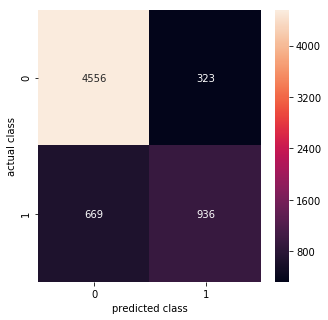

In [78]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(test_y,predicted_y),annot=True,fmt='.5g')
plt.ylabel('actual class')
plt.xlabel('predicted class')